<a href="https://colab.research.google.com/github/GengGengGengGeng/D4/blob/main/Cell_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cell counting project

### import libraries

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt

import numpy as np

from cv2 import imread, resize

import pandas as pd

import glob

import random

from tensorflow import keras

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping


### Unzip the files

In [2]:
# file path is here
!unzip /content/drive/MyDrive/Colab\ Notebooks/IDCIA.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/IDCIA.zip
   creating: IDCIA/ground_truth/
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_GFAP_F10_Cy3_ND2_20x.csv  
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_GFAP_F10_DAPI_ND1_20x.csv  
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_GFAP_F4_Cy3_ND2_20x.csv  
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_GFAP_F4_DAPI_ND1_20x.csv  
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_GFAP_F6_Cy3_ND2_20x.csv  
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_GFAP_F6_DAPI_ND1_20x.csv  
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_GFAP_F7_Cy3_ND2_20x.csv  
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_GFAP_F7_DAPI_ND1_20x.csv  
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_GFAP_F9_Cy3_ND2_20x.csv  
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_GFAP_F9_DAPI_ND1_20x.csv  
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_Ki67_F1_CY3_ND8_20x.csv  
  inflating: IDCIA/ground_truth/220909_GFP-AHPC_A_Ki67_F1_DAPI_ND

### Data generator class
### Description is included


In [3]:
class IDCIA(tf.keras.utils.Sequence):
      '''
          A custom tensorflow data generator class for loading the data. It reads the images and the ground truth files and returns a batch
          of images and the corresponding number of cells in the image.
          args:
              image_filenames: list of image filenames
              batch_size: batch size

          returns:
              batch of images and the corresponding number of cells in each image
      '''
      def __init__(self, image_filenames, batch_size,augmentation = True):
          self.image_filenames = image_filenames
          self.batch_size = batch_size
          self.augmentation = augmentation # Added a boolean flag for data augmentation. If True, apply data augmentation. If False, return the original image.

      def __len__(self):
          # How many batches are in the dataset. You can calculate this by dividing the total number of images by the batch size
          return np.ceil(len(self.image_filenames) / float(self.batch_size)).astype(int)

      def __data_augmentation(self, img):
          ''' function for apply some data augmentation '''
          img = tf.image.random_flip_left_right(img)
          img = tf.image.random_flip_up_down(img)
          return img

      def __getitem__(self, idx):
          # Get the filenames for the images in the batch.
          batch_x = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
          # Get the filenames for the ground truth files in the batch.
          batch_y = [label.replace('images','ground_truth').replace('.tiff','.csv') for label in self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]]
          # Read the csv files and get the number of cells in each image
          batch_y = [pd.read_csv(label).shape[0] for label in batch_y]

         # return np.array([
          #    self.__data_augmentation(resize(imread(file_name), (224, 224))/255.)
           #     for file_name in batch_x]), np.array(batch_y)


          # Read the images and resize them to 224x224
          if self.augmentation: # if augmentation is True, apply data augmentation
            return np.array([
              self.__data_augmentation(resize(imread(file_name), (224, 224))/255.)
              for file_name in batch_x]), np.array(batch_y)

          else: # if augmentation is False, return the original image. This will be used for validation and testing
            return np.array([
                 resize(imread(file_name), (224, 224))/255.
                 for file_name in batch_x]), np.array(batch_y)

### Test the generator by print one image

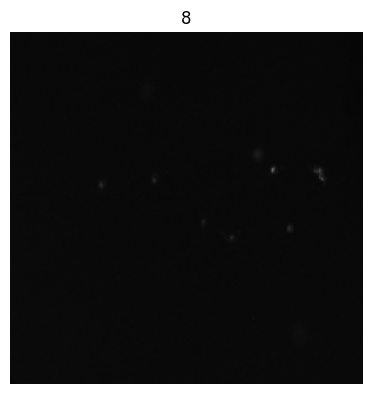

['/content/IDCIA/images/220912_GFP-AHPC_B_Nestin_F8_Cy3_ND2_20x.tiff', '/content/IDCIA/images/220912_GFP-AHPC_B_Map2AB_F9_Cy3_ND2_20x.tiff', '/content/IDCIA/images/220912_GFP-AHPC_B_Nestin_F1_DAPI_ND1_20x.tiff', '/content/IDCIA/images/220912_GFP-AHPC_C_Map2AB_F10_DAPI_ND1_20x.tiff', '/content/IDCIA/images/220912_GFP-AHPC_B_TuJ1_F8_DAPI_ND1_20x.tiff', '/content/IDCIA/images/220909_GFP-AHPC_D_GFAP_F6_Cy3_ND2_20x.tiff', '/content/IDCIA/images/220912_GFP-AHPC_B_TuJ1_F5_DAPI_ND1_20x.tiff', '/content/IDCIA/images/220912_GFP-AHPC_B_Nestin_F3_DAPI_ND1_20x.tiff', '/content/IDCIA/images/220912_GFP-AHPC_A_Nestin_F10_DAPI_ND1_20x.tiff', '/content/IDCIA/images/220909_GFP-AHPC_C_Ki67_F3_Cy3_ND8_20x.tiff', '/content/IDCIA/images/220912_GFP-AHPC_C_TuJ1_F3_Cy3_ND1_20x.tiff', '/content/IDCIA/images/220909_GFP-AHPC_A_GFAP_F7_DAPI_ND1_20x.tiff', '/content/IDCIA/images/220909_GFP-AHPC_A_Ki67_F3_CY3_ND8_20x.tiff', '/content/IDCIA/images/220912_GFP-AHPC_A_RIP_F4_Cy3_ND2_20x.tiff', '/content/IDCIA/images/2209

In [4]:
# test the data generator
image_filenames = glob.glob('/content/IDCIA/images/*.tiff')
random.shuffle(image_filenames)
dataset = IDCIA(image_filenames,batch_size=16, augmentation = True)
batch = dataset.__getitem__(0)
images = batch[0]
masks = batch[1]
for image, count in zip(images, masks):
 plt.figure(figsize=(10, 10))
 plt.subplot(1, 2, 1)
 plt.imshow(image)
 plt.axis('off')
 plt.title(f"{count}")
 plt.show()
 break
print(image_filenames)

### Create the train_generator, test_generator, and val_generator

In [5]:
train_filenames = pd.read_csv('/content/IDCIA/train.csv',header = None)
train = ['/content/IDCIA/images/' + i for i in train_filenames.iloc[:,0]]
#train
train_filenames.shape[0]

167

In [6]:
train_generator = IDCIA(train, batch_size = 32,augmentation = True)  ### Change augmentation

type(train_generator)


__main__.IDCIA

In [7]:
test_filenames = pd.read_csv('/content/IDCIA/test.csv',header = None)
test = ['/content/IDCIA/images/' + i for i in test_filenames.iloc[:,0]]

test_filenames.shape[0]

53

In [8]:
test_generator = IDCIA(test, batch_size = 16, augmentation = False)   ###change augmentation to false

type(test_generator)

__main__.IDCIA

In [9]:
val_filenames = pd.read_csv('/content/IDCIA/val.csv',header = None)  ###change augmentation to false
val = ['/content/IDCIA/images/' + i for i in val_filenames.iloc[:,0]]
val_filenames.shape[0]

42

In [10]:
val_generator = IDCIA(val, batch_size = 16,augmentation = False)

type(val_generator)

__main__.IDCIA

### Moedel 1: fully connected layer

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(20,activation = 'relu'),
    tf.keras.layers.Dense(8,activation = 'relu'),
    tf.keras.layers.Dense(1
        , activation="relu")
])

In [21]:

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer = opt,
    loss = 'mean_squared_error',
    metrics = ['mean_absolute_error'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 128)               19267712  
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 20)                1300      
                                                                 
 dense_13 (Dense)            (None, 8)                 168       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 19,277,445
Trainable params: 19,277,445


In [14]:
history = model.fit(train_generator, validation_data = val_generator, epochs = 50)

Epoch 1/50
6/6 [==============================] - 5s 563ms/step - loss: 14567.7129 - mean_absolute_error: 81.5923 - val_loss: 11636.7021 - val_mean_absolute_error: 81.7302
Epoch 2/50
6/6 [==============================] - 3s 491ms/step - loss: 14201.8623 - mean_absolute_error: 93.3160 - val_loss: 14386.8154 - val_mean_absolute_error: 77.7714
Epoch 3/50
6/6 [==============================] - 3s 607ms/step - loss: 12154.9580 - mean_absolute_error: 69.8946 - val_loss: 11859.6309 - val_mean_absolute_error: 76.2647
Epoch 4/50
6/6 [==============================] - 3s 474ms/step - loss: 11901.3135 - mean_absolute_error: 76.5337 - val_loss: 11689.7080 - val_mean_absolute_error: 76.9180
Epoch 5/50
6/6 [==============================] - 3s 497ms/step - loss: 12531.1064 - mean_absolute_error: 83.4390 - val_loss: 11533.3389 - val_mean_absolute_error: 79.7835
Epoch 6/50
6/6 [==============================] - 5s 809ms/step - loss: 11804.8594 - mean_absolute_error: 75.5715 - val_loss: 12062.8672 - v

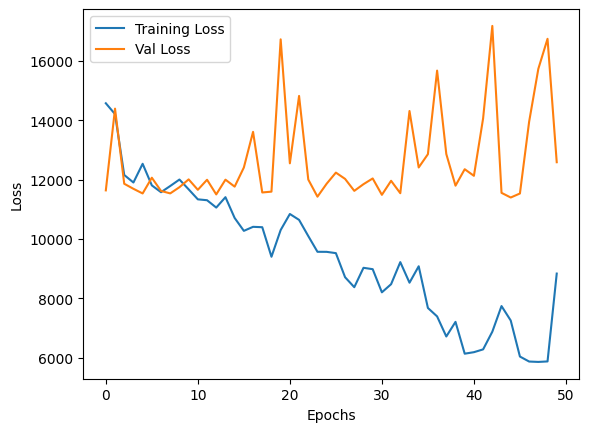

In [15]:
plt.plot(history.history['loss'],label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Overfitting is observed from the previous 50 epochs run.
### Using callback to early-stop the training

In [23]:
checkpoint = ModelCheckpoint('model.h5',monitor= 'mean_absolute_error',save_best_only= True, mode = 'min',verbose = 1)
early_stop = EarlyStopping (monitor = 'val_loss', patience = 10, mode = 'min', verbose = 1 )

history = model.fit(train_generator,epochs = 30, validation_data = val_generator, callbacks = [checkpoint, early_stop])

Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 17282.0039 - mean_absolute_error: 90.2349
Epoch 1: mean_absolute_error improved from inf to 90.23486, saving model to model.h5
6/6 [==============================] - 8s 1s/step - loss: 17282.0039 - mean_absolute_error: 90.2349 - val_loss: 14603.6592 - val_mean_absolute_error: 101.1645
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 14442.9912 - mean_absolute_error: 89.9009
Epoch 2: mean_absolute_error improved from 90.23486 to 89.90093, saving model to model.h5
6/6 [==============================] - 5s 716ms/step - loss: 14442.9912 - mean_absolute_error: 89.9009 - val_loss: 13808.3301 - val_mean_absolute_error: 77.0859
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 12168.6328 - mean_absolute_error: 72.5014
Epoch 3: mean_absolute_error improved from 89.90093 to 72.50143, saving model to model.h5
6/6 [==============================] - 4s 578ms/step - loss: 12168.6328 - mean_absolute_err

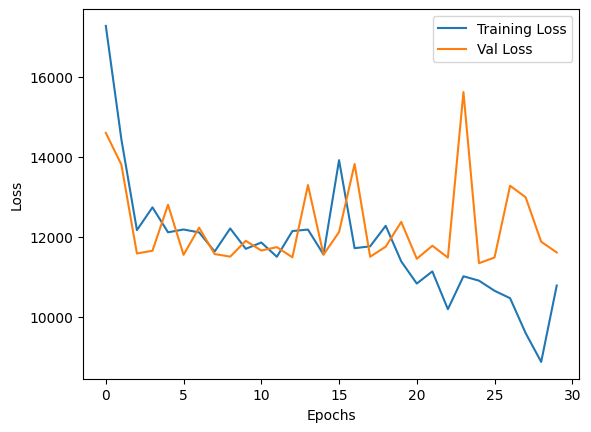

In [24]:
plt.plot(history.history['loss'],label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
from tables.tests.common import test_filename
#Evaluate the model
test_loss, test_mae = model.evaluate(test_generator)
print(f"Test loss: {test_loss}, Test MAE: {test_mae}")

# Custom evaluation metric: Accuracy within 5%
def accuracy_within_threshold(y_true, y_pred, threshold=0.05):
   diff = np.abs(y_true - y_pred) / y_true
   #f np.abs(y_true - y_pred) >  y_true * 0.05 :
    #return
   within_threshold = np.mean(diff <= threshold)
   return within_threshold

y_true = np.concatenate([batch[1] for batch in test_generator])
y_pred = np.squeeze(model.predict(test_generator))
j = 0
print (y_pred.shape)
for i in range(len(y_true)):
  if np.abs(y_true[i] - y_pred[i]) <  y_true[i] * 0.05 :
    j = j + 1
ACP = j/test_filenames.shape[0]
#acc_within_5 = accuracy_within_threshold(y_true, y_pred)
print(f"Accuracy within 5%: {ACP}")

4/4 [==============================] - 1s 113ms/step - loss: 10209.8730 - mean_absolute_error: 80.0303
Test loss: 10209.873046875, Test MAE: 80.0302734375
4/4 [==============================] - 1s 89ms/step
(53,)
Accuracy within 5%: 0.018867924528301886


### This model2 is already modified from the model2 in the presentation.
### The performace is improved at all metrcis.
### The ACP is increased to 0.075 in one of the event

In [59]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), strides = (1,1), padding = 'valid', input_shape = (224,224,3),activation = 'relu'),
    tf.keras.layers.Dropout((0.5)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters =3, kernel_size = 3, strides = (1,1), padding = 'valid', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    #tf.keras.layers.Dense(8,activation = 'relu'),
    tf.keras.layers.Dense(1
        , activation="relu")
])

In [60]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 dropout_6 (Dropout)         (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 3)       867       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 3)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 8748)             

In [61]:

opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(
    optimizer = opt,
    loss = 'mean_squared_error',
    metrics = ['mean_absolute_error'])

In [48]:
history2 = model2.fit(train_generator, validation_data = val_generator, epochs = 50)

Epoch 1/50
6/6 [==============================] - 21s 3s/step - loss: 1620.0752 - mean_absolute_error: 22.5942 - val_loss: 8615.2012 - val_mean_absolute_error: 59.0390
Epoch 2/50
6/6 [==============================] - 16s 3s/step - loss: 1492.3646 - mean_absolute_error: 21.7397 - val_loss: 8338.7100 - val_mean_absolute_error: 57.8936
Epoch 3/50
6/6 [==============================] - 16s 3s/step - loss: 1599.4225 - mean_absolute_error: 22.6403 - val_loss: 9116.0488 - val_mean_absolute_error: 61.0991
Epoch 4/50
6/6 [==============================] - 16s 3s/step - loss: 1462.7858 - mean_absolute_error: 22.1172 - val_loss: 7697.9600 - val_mean_absolute_error: 55.0295
Epoch 5/50
6/6 [==============================] - 17s 3s/step - loss: 1601.0359 - mean_absolute_error: 22.6446 - val_loss: 8896.7695 - val_mean_absolute_error: 60.3890
Epoch 6/50
6/6 [==============================] - 16s 3s/step - loss: 1487.5072 - mean_absolute_error: 22.0164 - val_loss: 8656.6035 - val_mean_absolute_error: 

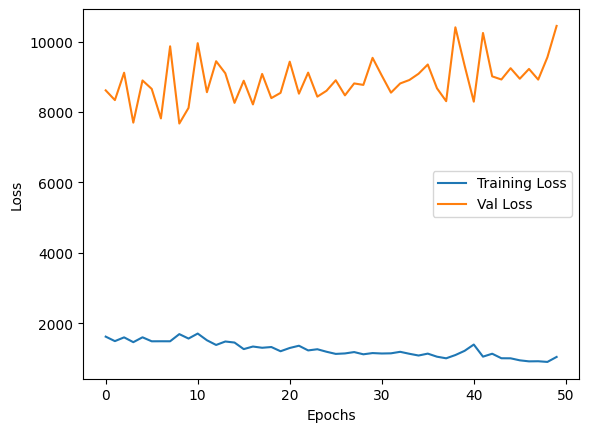

In [49]:
plt.plot(history2.history['loss'],label = 'Training Loss')
plt.plot(history2.history['val_loss'], label = 'Val Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
### This is after adding drop out


In [50]:
from tables.tests.common import test_filename
#Evaluate the model
test_loss, test_mae = model2.evaluate(test_generator)
print(f"Test loss: {test_loss}, Test MAE: {test_mae}")

# Custom evaluation metric: Accuracy within 5%
def accuracy_within_threshold(y_true, y_pred, threshold=0.05):
   diff = np.abs(y_true - y_pred) / y_true
   #f np.abs(y_true - y_pred) >  y_true * 0.05 :
    #return
   within_threshold = np.mean(diff <= threshold)
   return within_threshold

y_true = np.concatenate([batch[1] for batch in test_generator])
y_pred = np.squeeze(model2.predict(test_generator))
j = 0
print (y_pred.shape)
for i in range(len(y_true)):
  if np.abs(y_true[i] - y_pred[i]) <  y_true[i] * 0.05 :
    j = j + 1
ACP = j/test_filenames.shape[0]
#acc_within_5 = accuracy_within_threshold(y_true, y_pred)
print(f"Accuracy within 5%: {ACP}")

4/4 [==============================] - 1s 229ms/step - loss: 6515.0918 - mean_absolute_error: 54.0213
Test loss: 6515.091796875, Test MAE: 54.02128982543945
4/4 [==============================] - 1s 204ms/step
(53,)
Accuracy within 5%: 0.018867924528301886


In [62]:
# Further running using callback to train the model
checkpoint = ModelCheckpoint('model.h5',monitor= 'val_loss',save_best_only= True, mode = 'min',verbose = 1)
early_stop = EarlyStopping (monitor = 'val_loss', patience = 20, mode = 'min', verbose = 1 )

history2 = model2.fit(train_generator,epochs = 1000, validation_data = val_generator, callbacks = [checkpoint, early_stop])

Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 17128.0957 - mean_absolute_error: 79.0060
Epoch 1: val_loss improved from inf to 20769.16602, saving model to model.h5
6/6 [==============================] - 19s 3s/step - loss: 17128.0957 - mean_absolute_error: 79.0060 - val_loss: 20769.1660 - val_mean_absolute_error: 94.0714
Epoch 2/1000
6/6 [==============================] - ETA: 0s - loss: 17128.0957 - mean_absolute_error: 79.0060
Epoch 2: val_loss did not improve from 20769.16602
6/6 [==============================] - 16s 3s/step - loss: 17128.0957 - mean_absolute_error: 79.0060 - val_loss: 20769.1660 - val_mean_absolute_error: 94.0714
Epoch 3/1000
6/6 [==============================] - ETA: 0s - loss: 17128.0957 - mean_absolute_error: 79.0060
Epoch 3: val_loss did not improve from 20769.16602
6/6 [==============================] - 16s 3s/step - loss: 17128.0957 - mean_absolute_error: 79.0060 - val_loss: 20769.1660 - val_mean_absolute_error: 94.0714
Epoch 4/1000
6

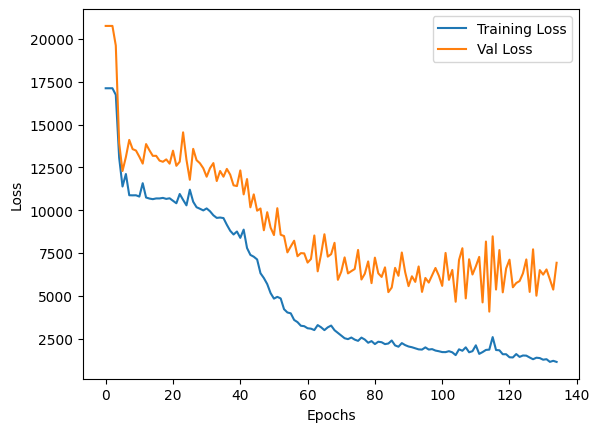

In [63]:
plt.plot(history2.history['loss'],label = 'Training Loss')
plt.plot(history2.history['val_loss'], label = 'Val Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### ACP

In [64]:
from tables.tests.common import test_filename
#Evaluate the model
test_loss, test_mae = model2.evaluate(test_generator)
print(f"Test loss: {test_loss}, Test MAE: {test_mae}")

# Custom evaluation metric: Accuracy within 5%
def accuracy_within_threshold(y_true, y_pred, threshold=0.05):
   diff = np.abs(y_true - y_pred) / y_true
   #f np.abs(y_true - y_pred) >  y_true * 0.05 :
    #return
   within_threshold = np.mean(diff <= threshold)
   return within_threshold

y_true = np.concatenate([batch[1] for batch in test_generator])
y_pred = np.squeeze(model2.predict(test_generator))
j = 0
print (y_pred.shape)
for i in range(len(y_true)):
  if np.abs(y_true[i] - y_pred[i]) <  y_true[i] * 0.05 :
    j = j + 1
ACP = j/test_filenames.shape[0]
#acc_within_5 = accuracy_within_threshold(y_true, y_pred)
print(f"Accuracy within 5%: {ACP}")

4/4 [==============================] - 1s 229ms/step - loss: 4202.4565 - mean_absolute_error: 43.3883
Test loss: 4202.45654296875, Test MAE: 43.3883171081543
4/4 [==============================] - 1s 209ms/step
(53,)
Accuracy within 5%: 0.03773584905660377
